<h1> Client Data </h1>

<ul>
    <li>id = client company identifier 
	<li>activity_new = category of the company’s activity </li>
	<li>channel_sales = code of the sales channel</li>
	<li>cons_12m = electricity consumption of the past 12 months</li>
	<li>cons_gas_12m = gas consumption of the past 12 months</li>
	<li>cons_last_month = electricity consumption of the last month</li>
	<li>date_activ = date of activation of the contract</li>
	<li>date_end = registered date of the end of the contract</li>
	<li>date_modif_prod = date of the last modification of the product</li>
	<li>date_renewal = date of the next contract renewal</li>
	<li>forecast_cons_12m = forecasted electricity consumption for next 12 months</li>
	<li>forecast_cons_year = forecasted electricity consumption for the next calendar year</li>
	<li>forecast_discount_energy = forecasted value of current discount</li>
	<li>forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months</li>
	<li>forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)</li>
	<li>forecast_price_energy_peak = forecasted energy price for 2nd period (peak)</li>
	<li>forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)</li>
	<li>has_gas = indicated if client is also a gas client</li>
	<li>imp_cons = current paid consumption</li>
	<li>margin_gross_pow_ele = gross margin on power subscription</li>	
    <li>margin_net_pow_ele = net margin on power subscription</li>
	<li>nb_prod_act = number of active products and services</li>
	<li>net_margin = total net margin</li>
	<li>num_years_antig = antiquity of the client (in number of years)</li>
	<li>origin_up = code of the electricity campaign the customer first subscribed to</li>
	<li>pow_max = subscribed power</li>
	<li>churn = has the client churned over the next 3 months</li>

</ul>

### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

### Reading The Data

In [2]:
client_df = pd.read_csv('client_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


### Explore Data

#### Shape

In [4]:
print(f"The shape of client data is: {client_df.shape}")

The shape of client data is: (14606, 26)


#### Data Type

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

#### Missing Data

In [6]:
#Check how much of our data is missing
pd.DataFrame({"Missing value (%)": client_df.isnull().sum()/len(client_df.index)*100})

,Missing value (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


### Descriptive statistics of data

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


### Data Preprocessing

In [8]:
columns = ['churn' , 'has_gas' ,'num_years_antig', 'origin_up']

In [9]:
for column in columns:
    print(f"Values for '{column}' column:")
    print(client_df[column].value_counts(ascending = False))
    print("\n---------------------------------------------------------------\n")

Values for 'churn' column:
0    13187
1     1419
Name: churn, dtype: int64

---------------------------------------------------------------

Values for 'has_gas' column:
f    11955
t     2651
Name: has_gas, dtype: int64

---------------------------------------------------------------

Values for 'num_years_antig' column:
6     4769
4     3982
3     2433
5     2317
7      509
11     185
12     110
8      103
9       92
10      81
13      13
2       11
1        1
Name: num_years_antig, dtype: int64

---------------------------------------------------------------

Values for 'origin_up' column:
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

---------------------------------------------------------------



In [10]:
# create new column from 'churn' column 
client_df['churn_objective']=client_df['churn'].astype('object').replace({0:'retention',1:'churn'})

In [11]:
client_df['churn_objective'].value_counts()

retention    13187
churn         1419
Name: churn_objective, dtype: int64

In [12]:
# replace values in 'has_gas' column to be ['Subscribed' , 'Unsubscribed']
client_df['has_gas']=client_df['has_gas'].replace({'t':'Subscribed','f':'Unsubscribed'})

In [13]:
client_df['has_gas'].value_counts()

Unsubscribed    11955
Subscribed       2651
Name: has_gas, dtype: int64

## Data Visualization

### Pie Charts

#### Churning Status

In [14]:
retention=client_df['churn'].value_counts()[0]
churn=client_df['churn'].value_counts()[1]

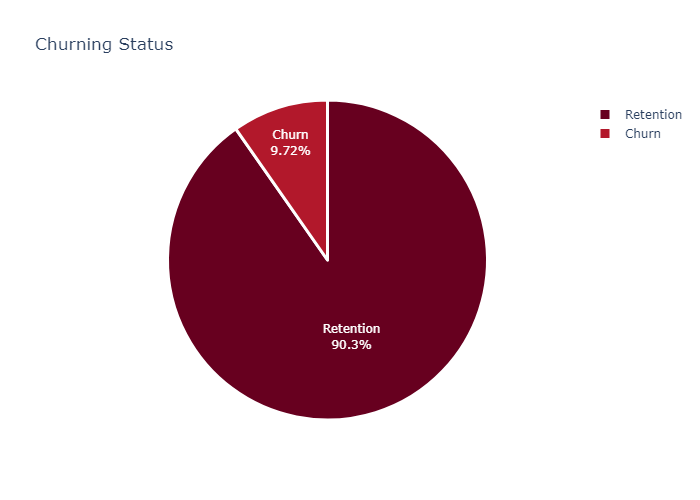

In [15]:
fig=px.pie(values=[retention,churn],names=['Retention','Churn'],title='Churning Status', 
           color_discrete_sequence=px.colors.sequential.RdBu )

fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker=dict(line=dict(color='rgb(255,255,255)', width=3)))

fig.show('png')

#### Gas subscribtion

In [16]:
#Gas subscribtion
Unsubscribed = client_df['has_gas'].value_counts()[0]
Subscribed = client_df['has_gas'].value_counts()[1]

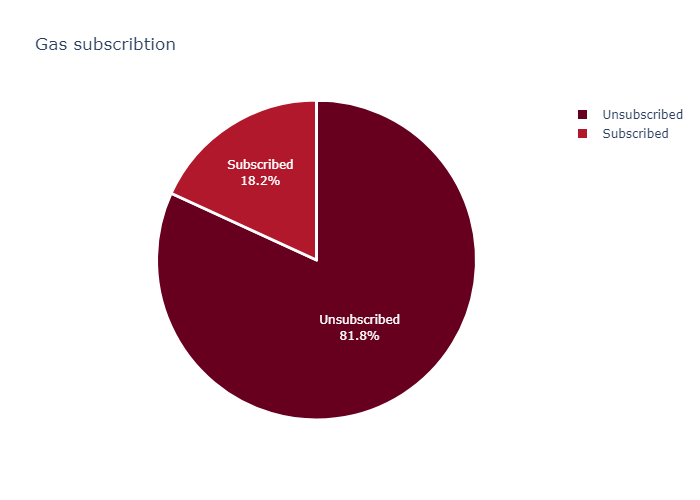

In [17]:
fig=px.pie(values=[Unsubscribed,Subscribed],names=['Unsubscribed','Subscribed'],title='Gas subscribtion', 
           color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker=dict(line=dict(color='rgb(255,255,255)', width=3)))

fig.show('png')

### Histogram

In [18]:
def histogram(data_column):
    fig=px.histogram(client_df,x=data_column,color='churn_objective',marginal='box',color_discrete_map={'retention':'rgb(112,128,144)'
                                                                                                          ,'churn':'rgb(0,0,0)'},title='The Distribution of '+data_column)
    fig.update_layout({'legend':{'bgcolor':'rgb(238,255,230)'}})
    fig.update_layout({'plot_bgcolor':'white'})
    fig.show('png')

In [19]:
# Displaying The distribution of this columns
columns = ['margin_gross_pow_ele','margin_net_pow_ele' , 'nb_prod_act','net_margin' , 'pow_max']

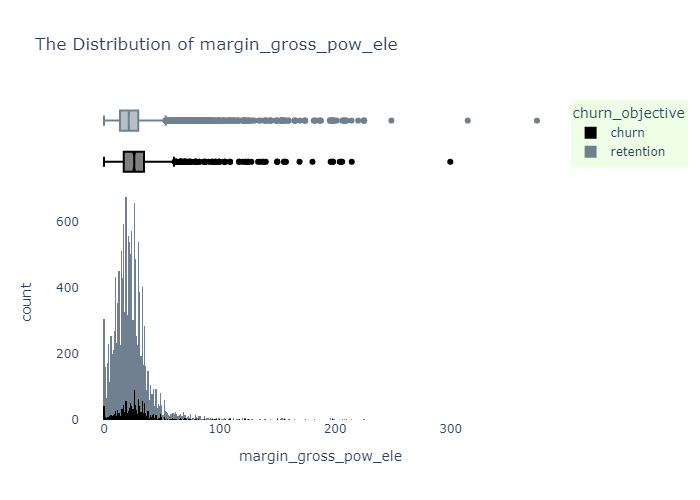

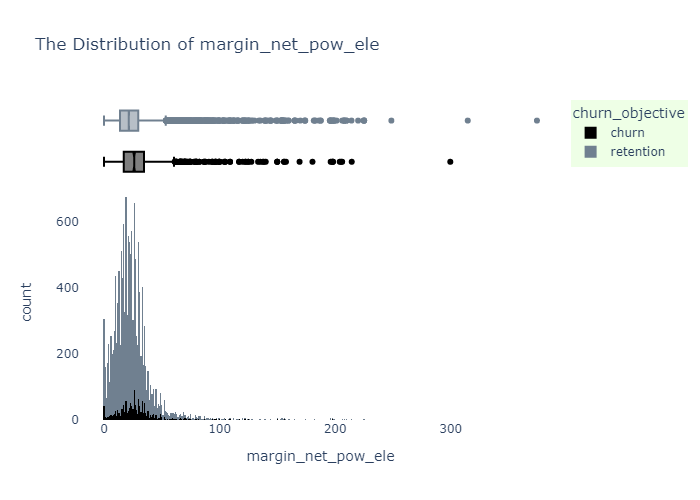

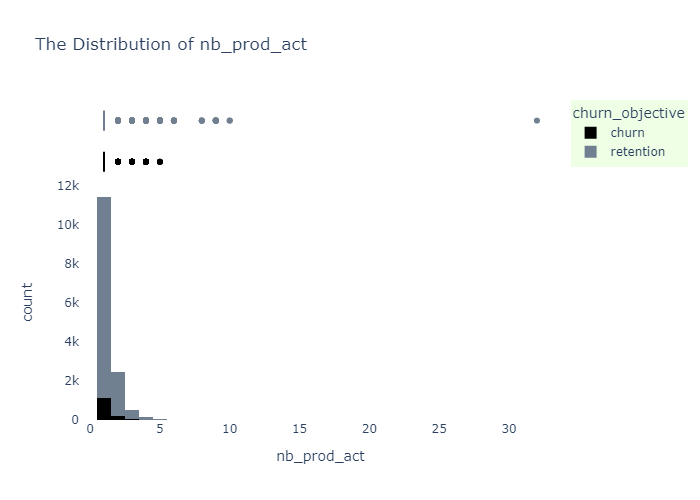

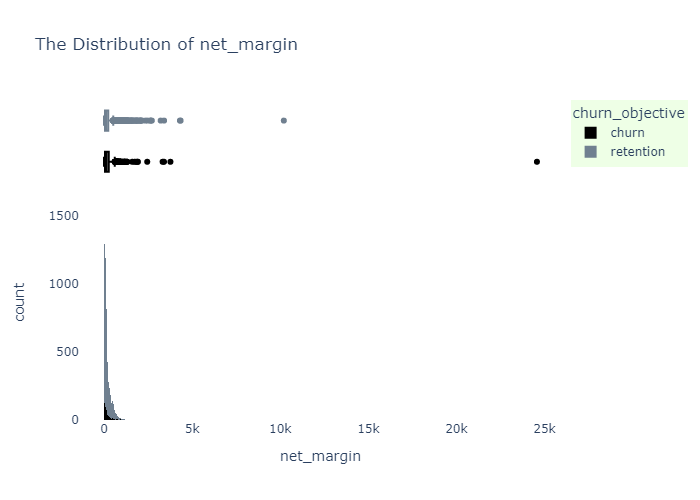

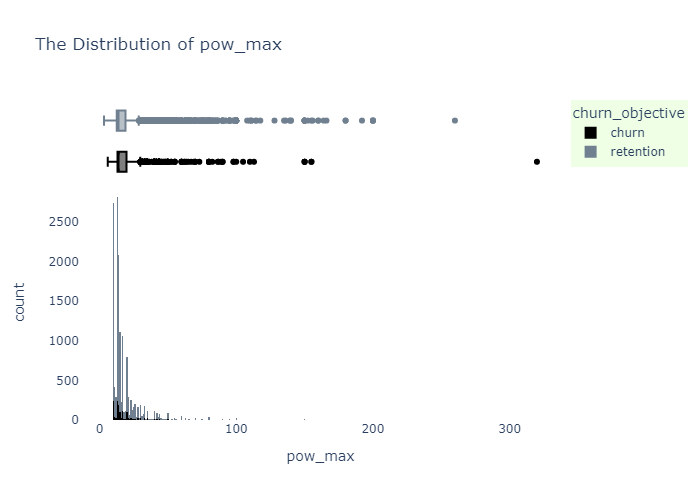

In [20]:
for column in columns:
    histogram(column)

#### Distribution of Consumption

In [21]:
columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month' ,'imp_cons']

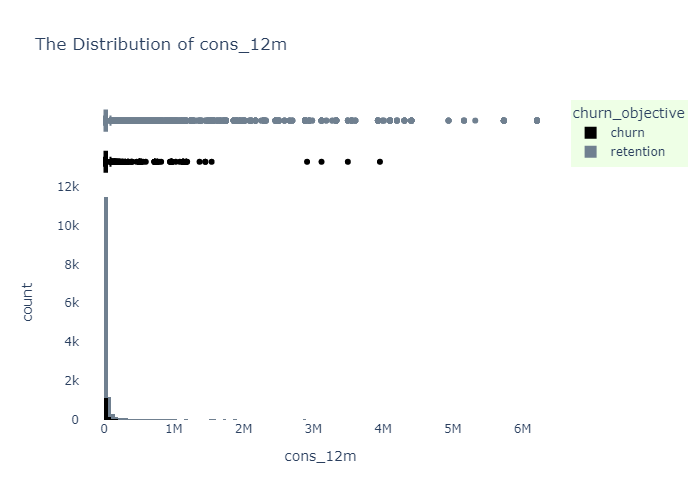

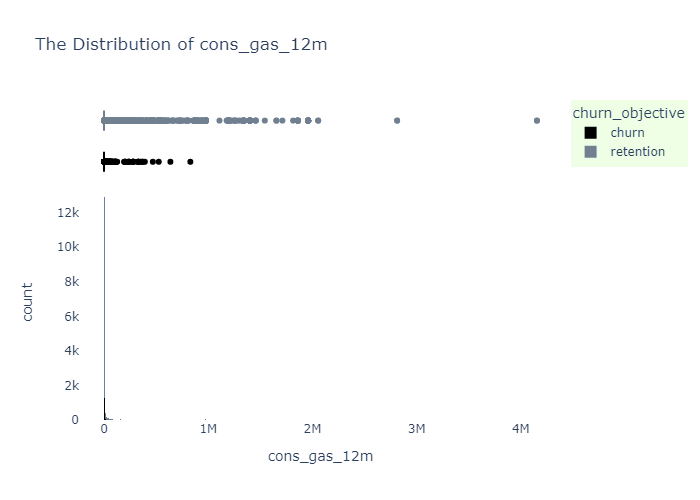

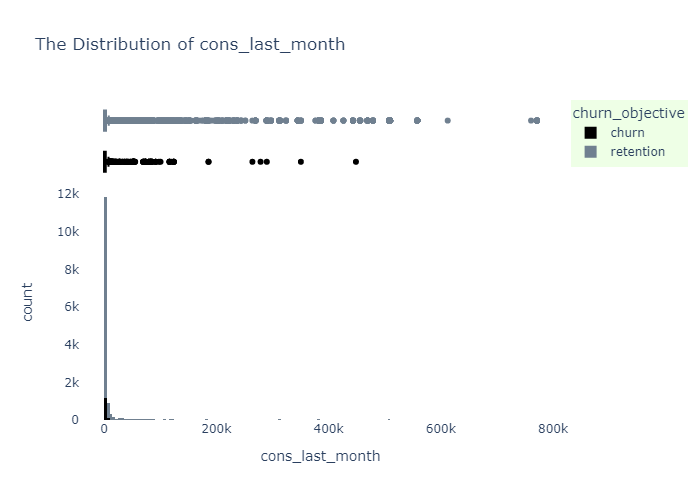

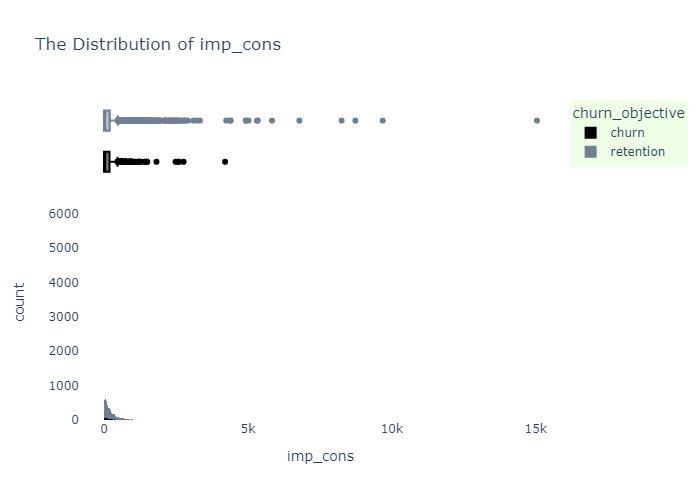

In [22]:
for column in columns:
    histogram(column)

#### Distribution of Forcast

In [23]:
columns = ['forecast_cons_year' , 'forecast_discount_energy' , 'forecast_meter_rent_12m' , 'forecast_price_energy_off_peak',
           'forecast_price_energy_peak','forecast_price_pow_off_peak'
          ]

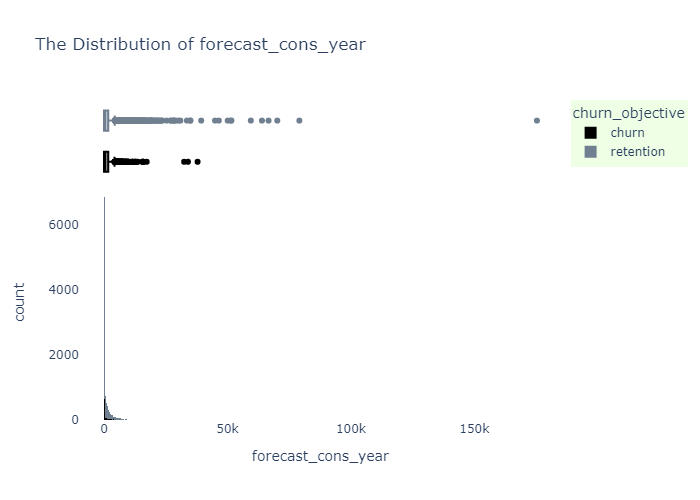

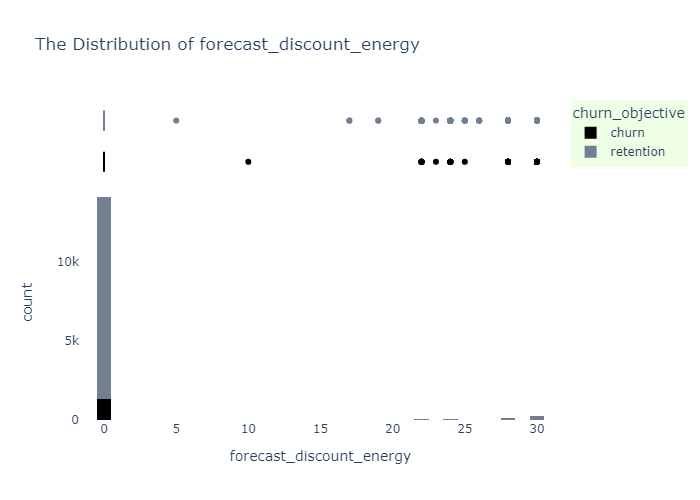

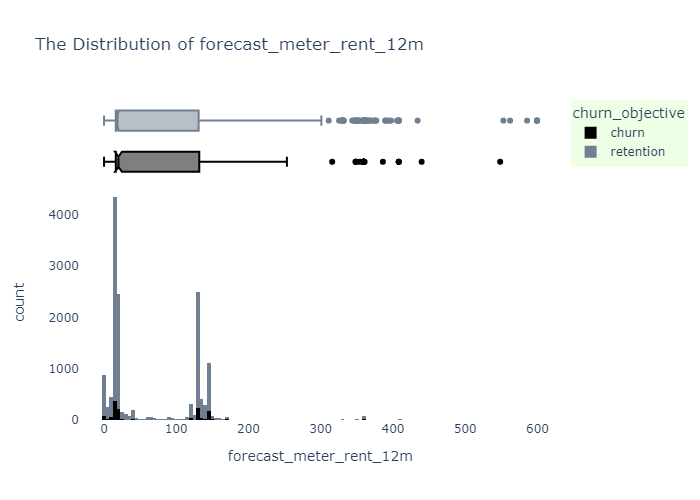

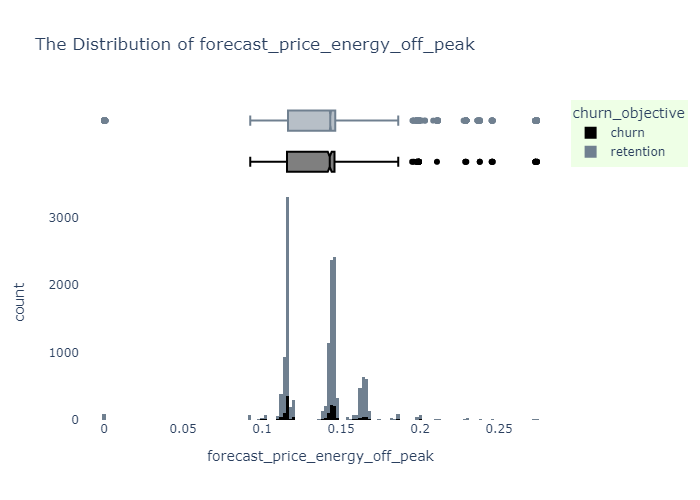

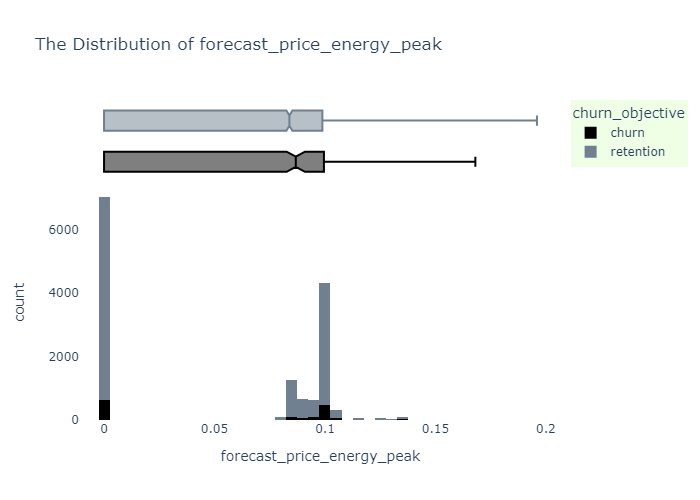

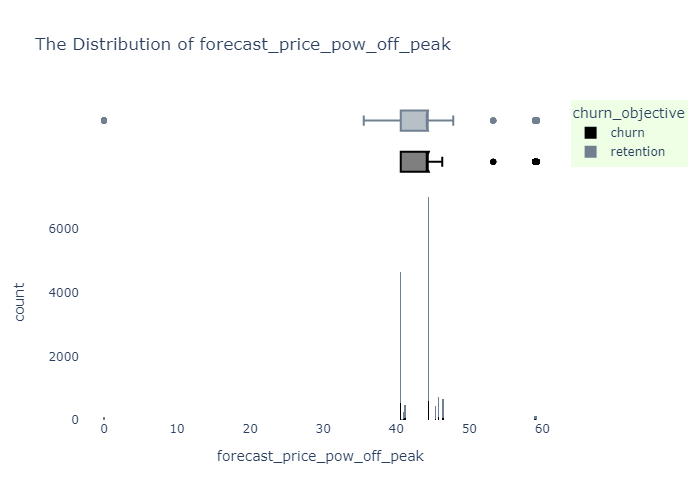

In [24]:
for column in columns:
    histogram(column)

<h1> Price Data </h1>

<ul>
    <li>id = client company identifier</li>
	<li>price_date = reference date </li>
	<li>price_off_peak_var = price of energy for the 1st period (off peak)</li>
	<li>price_peak_var = price of energy for the 2nd period (peak)</li>
	<li>price_mid_peak_var = price of energy for the 3rd period (mid peak)</li>
	<li>price_off_peak_fix = price of power for the 1st period (off peak)</li>
	<li>price_peak_fix = price of power for the 2nd period (peak)</li>
	<li>price_mid_peak_fix = price of power for the 3rd period (mid peak)</li>
</ul>

### Reading The Data

In [25]:
price_df = pd.read_csv('price_data.csv')

In [26]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### Explore Data

#### Shape

In [27]:
print(f"The shape of price data is: {price_df.shape}")

The shape of price data is: (193002, 8)


#### Data Type

In [28]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### Missing Data

In [29]:
#Check how much of our data is missing
pd.DataFrame({"Missing value (%)": price_df.isnull().sum()/len(price_df.index)*100})

,Missing value (%)
id,0.0
price_date,0.0
price_off_peak_var,0.0
price_peak_var,0.0
price_mid_peak_var,0.0
price_off_peak_fix,0.0
price_peak_fix,0.0
price_mid_peak_fix,0.0


### Descriptive statistics of data

In [30]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


## Merging client and price data sets

In [31]:
price_data1=price_df.groupby(by='id').sum()
price_data1.head()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,1.492061,1.245525,0.877924,488.420789,293.052462,195.368327
0004351ebdd665e6ee664792efc4fd13,1.757118,0.000000,0.000000,532.625404,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,2.178702,0.000000,0.000000,543.836520,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,1.425085,1.179509,0.828384,487.769130,292.661462,195.107656
00114d74e963e47177db89bc70108537,1.775110,0.000000,0.000000,531.203164,0.000000,0.000000


In [32]:
data=client_df.merge(price_data1,on='id')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,churn_objective,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,churn,1.497445,1.208992,0.798365,491.307186,268.224124,178.816084
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,retention,1.795307,0.085483,0.000000,531.736503,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,retention,2.046140,1.061055,0.000000,532.625404,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,retention,1.814521,0.000000,0.000000,532.803183,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,retention,1.490092,1.243658,0.874383,488.257873,292.954712,195.303161


In [33]:
cols=data.columns.tolist()
cols

['id',
 'channel_sales',
 'cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'has_gas',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'origin_up',
 'pow_max',
 'churn',
 'churn_objective',
 'price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix']

In [34]:
col=cols[:25]+cols[27:]+cols[25:27]
data=data[col]
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,churn_objective
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.497445,1.208992,0.798365,491.307186,268.224124,178.816084,1,churn
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,1.795307,0.085483,0.000000,531.736503,0.000000,0.000000,0,retention
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2.046140,1.061055,0.000000,532.625404,0.000000,0.000000,0,retention
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1.814521,0.000000,0.000000,532.803183,0.000000,0.000000,0,retention
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,1.490092,1.243658,0.874383,488.257873,292.954712,195.303161,0,retention


### Visualization

In [35]:
def histogram(data_column):
    fig=px.histogram(data,x=data_column,color='churn_objective',marginal='box',color_discrete_map={'retention':'rgb(112,128,144)'
                                                                                                          ,'churn':'rgb(0,0,0)'},title='The Distribution of '+data_column)
    fig.update_layout({'legend':{'bgcolor':'rgb(238,255,230)'}})
    fig.update_layout({'plot_bgcolor':'white'})
    fig.show('png')

In [36]:
columns =['price_off_peak_var', 'price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix',
          'price_mid_peak_fix']

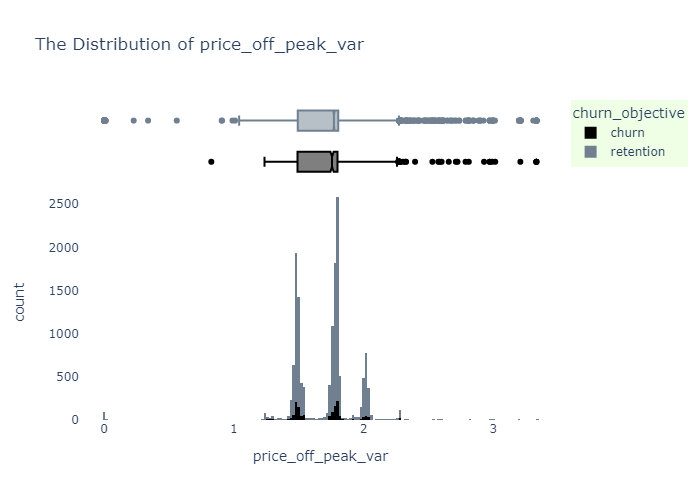

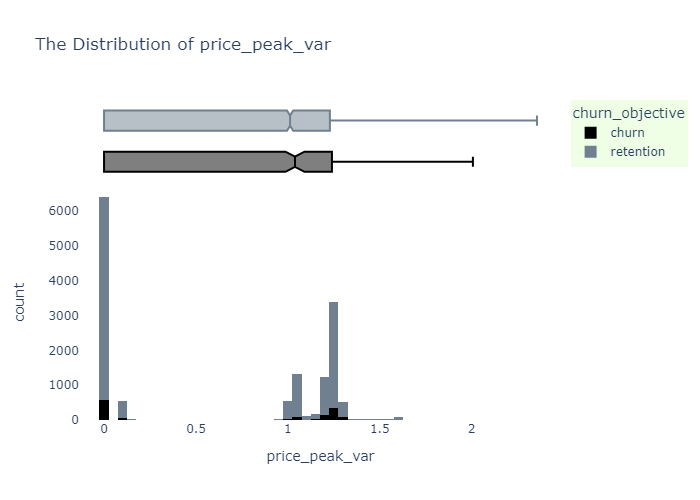

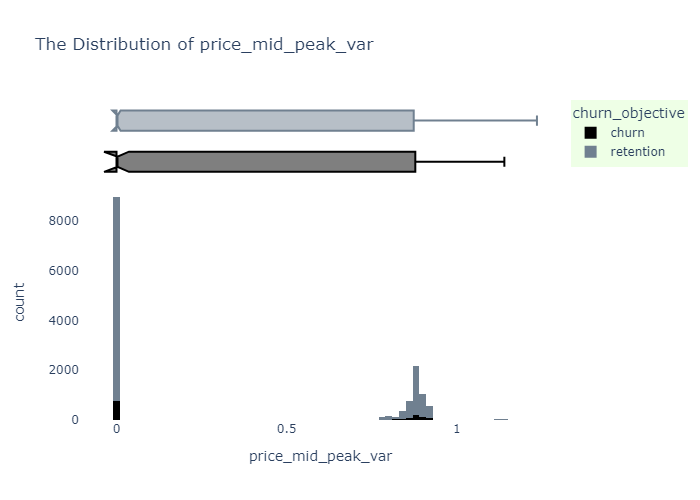

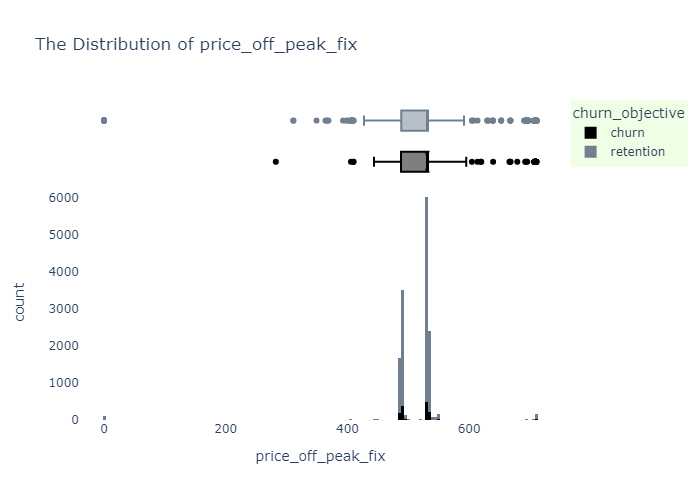

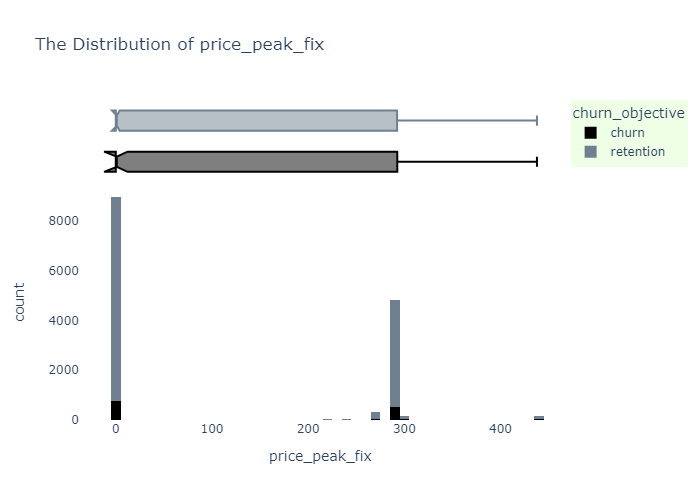

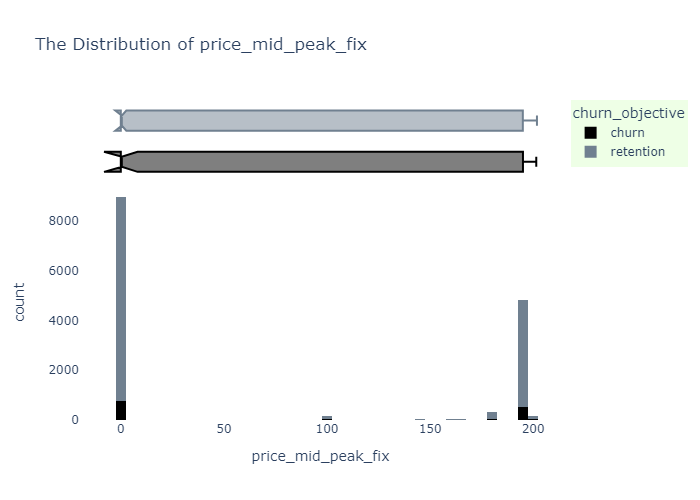

In [37]:
for column in columns:
    histogram(column)